# Exploratory Visual Analysis

### Content:
- Correlation Matrix Heatmap
- Scatterplot
- Pairplot
- Categorical Plot
- Derive Car Price Variable 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#show all plots after creating them
%matplotlib inline

In [3]:
#import data
path = '/Users/kimballwightman/Documents/CareerFoundry/Used Car Sales Analysis/' 

In [4]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cars_cleaned.csv'), index_col = [0])

In [5]:
#determine which variables are irrelevant for analysis
df_cars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


"Vin" isn't relevant to our analysis here.

In [6]:
#create a subset excluding the 'Vin' variable
sub = df_cars[['Price','Year','Mileage','City','State','Make','Model']]

In [7]:
sub

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic
...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,Volvo,V90


### Correlation Matrix Heatmap

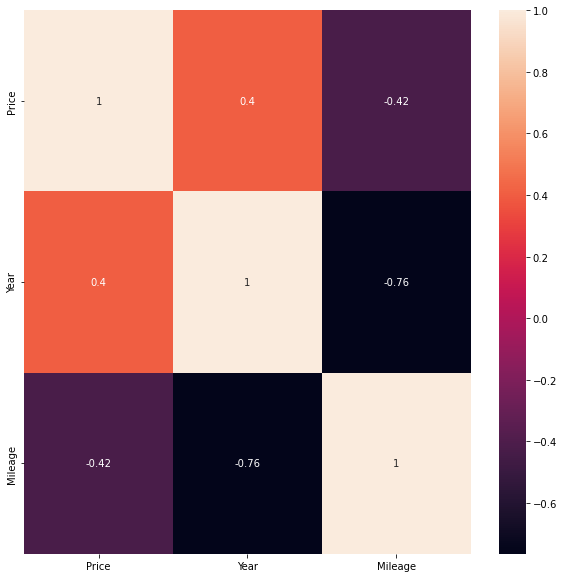

In [8]:
#create a subplot with matplotlib
f,ax = plt.subplots(figsize = (10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

The matrix shows three correlations:

1) Year and Mileage, -0.76 (strong negative relationship): the older the car, the higher the mileage.

2) Price and Mileage, -0.42 (moderate negative relationship): the higher the mileage, the lower the price.

3) Year and Price, 0.4 (moderate postive relationship): the newer the car, the higher the price.

### Scatterplot

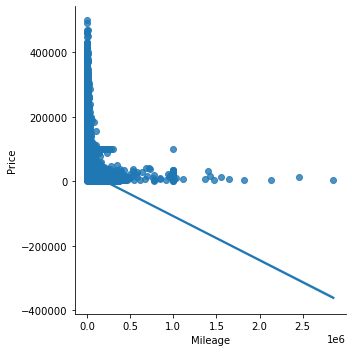

In [9]:
#create a scatterplot between Year and Mileage
sns.lmplot(x = 'Mileage', y = 'Price', data = sub)

The regression line here isn't as useful as we might have hoped. Most of the observations are clumped together at the bottom-left, and the trend line extends way below zero, which is not the best predictor. A problem we're seeing here is that we have a lot of cars well above 100,000 dollars, as well as a lot of cars well above 500,000 miles that are causing us to "zoom out" more than we'd like. Most of the observations are clumped together in the thick bottom left part. This is something we'll need to fix.

### Pairplot

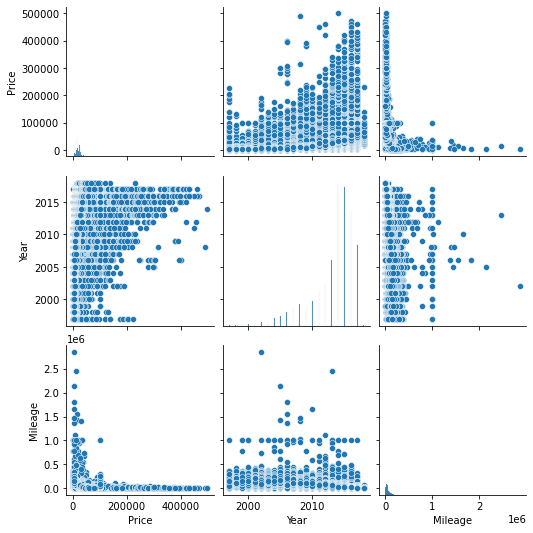

In [10]:
#create a pairplot
g = sns.pairplot(sub)

We have some outliers in our dataset with very high mileage, above 2 million miles, as well as high price up to 500,000. That's why the ditributions for price and mileage look so small. I didn't eliminate these outliers, because they probably contain valuable information for specific kinds of cars. These two distributions are obviously right-skewed, while the year distribution is left-skewed.

One thing I want to check out is there are many cars with exactly one million miles for many given years. It seems fishy to me, it might be another issue with data quality.

### Categorical Plot

<AxesSubplot:xlabel='Price', ylabel='Count'>

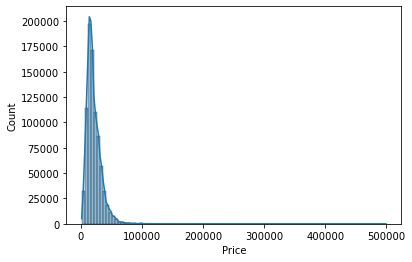

In [11]:
#generate a flag variable if car has high price or high mileage
#first, create histograms to identify cutoffs for outliers
sns.histplot(sub['Price'], bins = 100, kde = True)

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

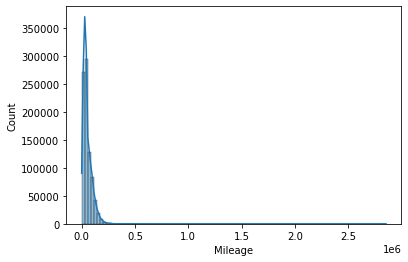

In [12]:
sns.histplot(sub['Mileage'], bins = 100, kde = True)

In [13]:
#price flag
sub.loc[sub['Price'] > 100000, 'Price_Flag'] = 'High Price'

In [14]:
sub.loc[sub['Price'] <= 100000, 'Price_Flag'] = 'Low Price'

In [15]:
sub['Price_Flag'].value_counts(dropna = False)

Low Price     850337
High Price      1755
Name: Price_Flag, dtype: int64

In [16]:
#mileage flag
sub.loc[sub['Mileage'] > 500000, 'Mileage_Flag'] = 'High Mileage'

In [17]:
sub.loc[sub['Mileage'] <= 500000, 'Mileage_Flag'] = 'Low Mileage'

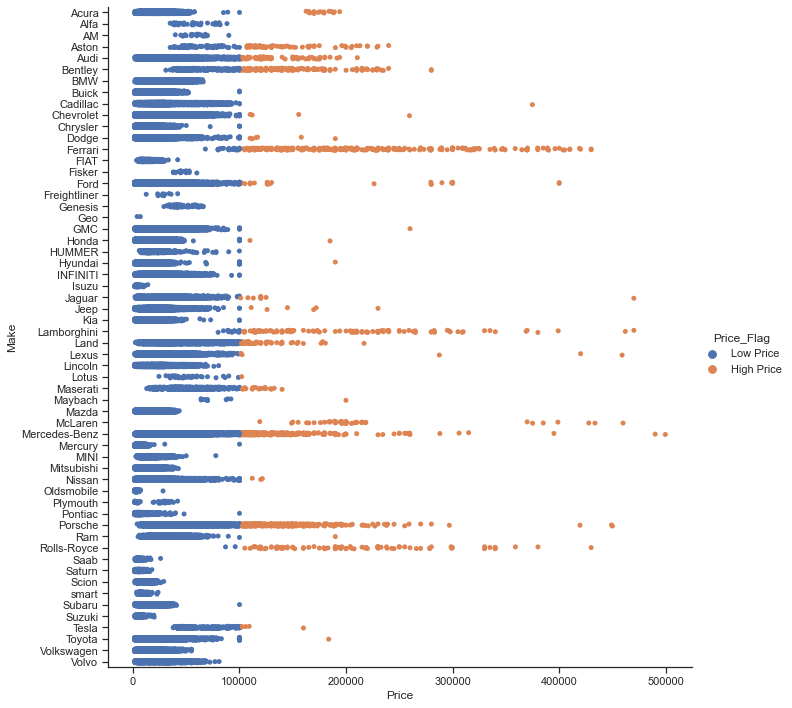

In [18]:
#create a categorical plot for price and make
sns.set(style = 'ticks')
g = sns.catplot(x = 'Price', y = 'Make', hue = 'Price_Flag', data = sub, height = 10)

Notable outlier makes: Aston, Audi, Bentley, Ferrari, Lamborghini, Land Rover, McLaren, Mercedez-Benz, Porsche, Rolls-Royce

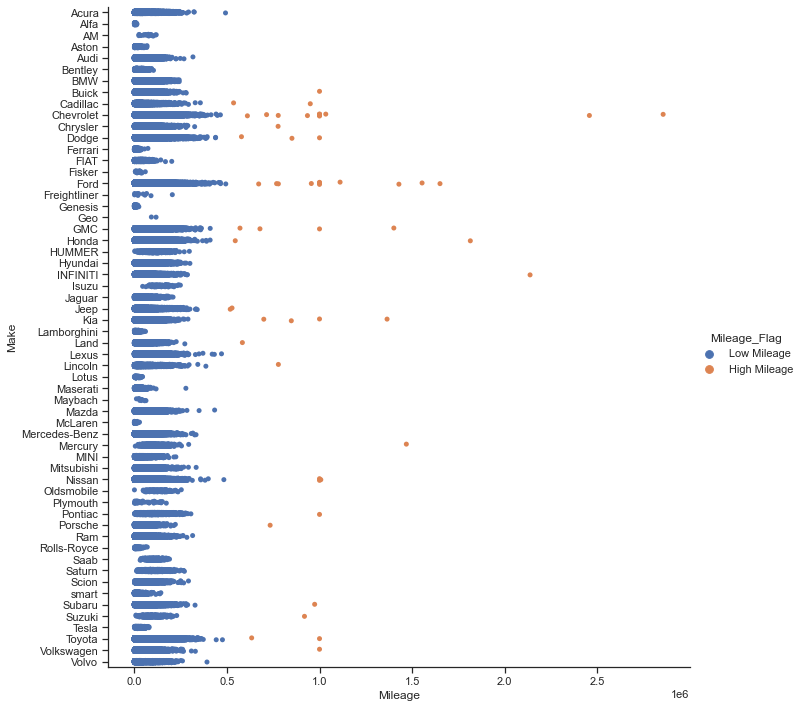

In [19]:
#create another catplot for mileage and make
sns.set(style = 'ticks')
g = sns.catplot(x = 'Mileage', y = 'Make', hue = 'Mileage_Flag', data = sub, height = 10)

Notable high mileage makes are Chevrolet, Dodge, Ford, GMC, Honda, and Toyota. These also are the car makes of the highest count of listings on the website. 

### Derive Price Score Variable

In [20]:
#create new columns for standardized versions of mileage, year, and price
sub['mileage_score'] = (sub['Mileage'] / 500000) * 100

In [21]:
sub.loc[sub['mileage_score'] > 100, 'mileage_score'] = 100

There are few values in the dataset that have mileage above 500,000. I changed these to just have a score of 100 so that the range for mileage score would stop at 500,000 instead of almost 3,000,000, This gives us a better spread in our mileage_score, otherwise they would all be very low scores.

In [22]:
sub['year_score'] = ((2019 - sub['Year']) / (2018 - 1996)) * 100

In [23]:
#create a price score based on the distribution of prices among the make to which the car belongs
#first we need to get the max and min of prices by each car make
df_dist = sub.groupby('Make').agg({'Price':['min','max']})

In [24]:
df_dist

Price        
                  min     max
Make                         
AM              39795   89999
Acura            1900  194000
Alfa            34995   88245
Aston           35000  239950
Audi             1880  210576
BMW              1993   65985
Bentley         30888  279990
Buick            1500   99999
Cadillac         1850  374813
Chevrolet        1500  259503
Chrysler         1500  100000
Dodge            1500  189883
FIAT             3397   42000
Ferrari         67995  429900
Fisker          37985   60000
Ford             1500  399999
Freightliner    12500   41995
GMC              1500  259999
Genesis         29080   65999
Geo              3995    6999
HUMMER           5900   99888
Honda            1500  184990
Hyundai          1500  189911
INFINITI         1599   99999
Isuzu            1500   13995
Jaguar           1990  469973
Jeep             1500  229977
Kia              1500   99999
Lamborghini     79975  469991
Land             2325  216888
Lexus            1670  458988
Lincoln          1500   80459
Lotus           24500  102030
MINI             2695   77777
Maserati        12950  140000
Maybach         63985  199888
Mazda            1500   43499
McLaren        119000  459880
Mercedes-Benz    1500  499500
Mercury          1500   99999
Mitsubishi       1500   42695
Nissan           1500  121495
Oldsmobile       1500   28290
Plymouth         1527   41900
Pontiac          1500   99998
Porsche          3991  449900
Ram              4888  189950
Rolls-Royce     86888  429888
Saab             1895   25999
Saturn           1500   17796
Scion            1900   28879
Subaru           1775   99999
Suzuki           1900   20000
Tesla           37900  159985
Toyota           1500  183710
Volkswagen       1500   55101
Volvo            1500   80895
smart            3499   23588

In [25]:
#set Make as a column instead of the index so it can be merged onto our sub dataframe
df_dist.columns = df_dist.columns.droplevel(0)

df_dist['Make'] = df_dist.index

df_dist.index.names = ['']

df_dist

,min,max,Make
,,,
AM,39795,89999,AM
Acura,1900,194000,Acura
Alfa,34995,88245,Alfa
Aston,35000,239950,Aston
Audi,1880,210576,Audi
BMW,1993,65985,BMW
Bentley,30888,279990,Bentley
Buick,1500,99999,Buick
Cadillac,1850,374813,Cadillac


In [26]:
#create a standardized price variable for prices among each make
df_price_score = pd.merge(sub, df_dist, on = ['Make'], indicator = True)

In [27]:
df_price_score.head()

,Price,Year,Mileage,City,State,Make,Model,Price_Flag,Mileage_Flag,mileage_score,year_score,min,max,_merge
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,7.1450,22.727273,1900,194000,both
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,Low Price,Low Mileage,3.9212,27.272727,1900,194000,both
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,9.7702,27.272727,1900,194000,both
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,Low Price,Low Mileage,7.9844,22.727273,1900,194000,both
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,Low Price,Low Mileage,4.4284,13.636364,1900,194000,both


In [28]:
df_price_score['_merge'].value_counts()

both          852092
left_only          0
right_only         0
Name: _merge, dtype: int64

In [29]:
df_price_score = df_price_score.drop(columns = ['_merge'])

In [30]:
df_price_score.rename(columns = {'min':'price_min','max':'price_max'}, inplace = True)

In [32]:
#price score variable
df_price_score['price_score'] = (df_price_score['Price'] - df_price_score['price_min'])/(df_price_score['price_max'] - df_price_score['price_min']) * 100


In [34]:
df_price_score.sort_values(by=['Price'], ascending = True).head(30)

,Price,Year,Mileage,City,State,Make,Model,Price_Flag,Mileage_Flag,mileage_score,year_score,price_min,price_max,price_score
230235,1500,2001,181863,Cedar Falls,IA,Dodge,Intrepid4dr,Low Price,Low Mileage,36.3726,81.818182,1500,189883,0.0
299798,1500,2001,155458,Blaine,MN,Ford,Taurus4dr,Low Price,Low Mileage,31.0916,81.818182,1500,399999,0.0
283408,1500,2006,142921,Machesney Park,IL,Ford,Taurus4dr,Low Price,Low Mileage,28.5842,59.090909,1500,399999,0.0
284891,1500,2002,172985,Hillsdale,MI,Ford,F-1502WD,Low Price,Low Mileage,34.5970,77.272727,1500,399999,0.0
631565,1500,2001,89928,Miramar,FL,Mitsubishi,Galant4dr,Low Price,Low Mileage,17.9856,81.818182,1500,42695,0.0
446635,1500,2005,140317,Lakewood,NJ,Hyundai,Elantra4dr,Low Price,Low Mileage,28.0634,63.636364,1500,189911,0.0
594473,1500,2004,151283,New Castle,PA,Mazda,Mazda34dr,Low Price,Low Mileage,30.2566,68.181818,1500,43499,0.0
226488,1500,1999,209499,Middlesboro,KY,Dodge,Ram,Low Price,Low Mileage,41.8998,90.909091,1500,189883,0.0
193730,1500,2002,110588,Portsmouth,OH,Chrysler,300M4dr,Low Price,Low Mileage,22.1176,77.272727,1500,100000,0.0
518236,1500,2000,263124,Arlington Heights,IL,Jeep,Grand,Low Price,Low Mileage,52.6248,86.363636,1500,229977,0.0


As we can see above, all the cars have the same price of 1500, but the price score varies depending on the make of the car.

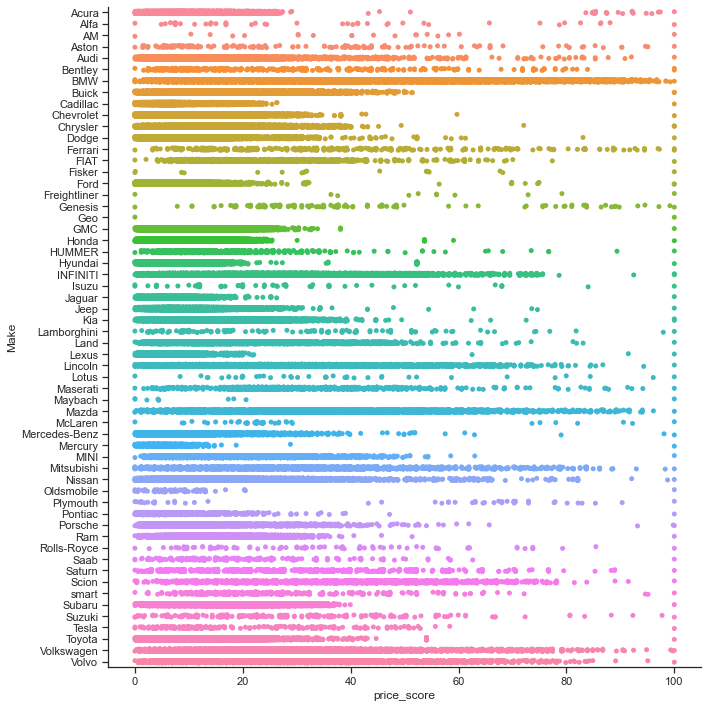

In [35]:
#catplot for new price score
sns.set(style = 'ticks')
g = sns.catplot(x = 'price_score', y = 'Make', data = df_price_score, height = 10)

The distributions of price among different makes are a bit more consistent here than what we had above with just price.

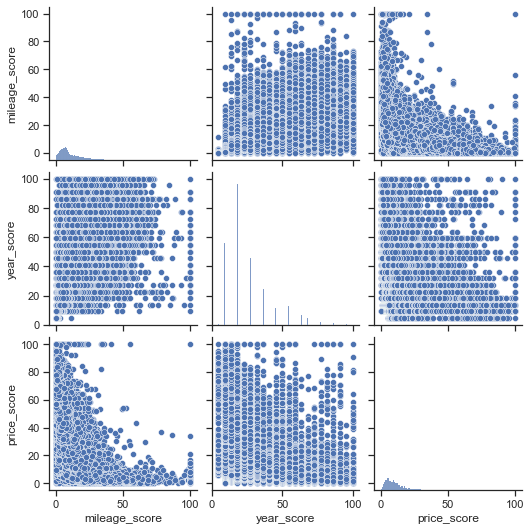

In [36]:
g = sns.pairplot(df_price_score, vars = ['mileage_score','year_score','price_score'])

In [37]:
#check some distributions of value scores for individual makes
bmw_sub = df_price_score[df_price_score['Make'] == 'BMW']
ford_sub = df_price_score[df_price_score['Make'] == 'Ford']
ferrari_sub = df_price_score[df_price_score['Make'] == 'Ferrari']

<AxesSubplot:xlabel='price_score', ylabel='Count'>

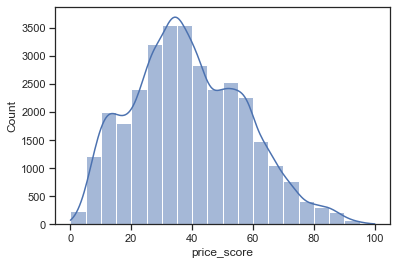

In [38]:
#BMW
sns.histplot(bmw_sub['price_score'], bins = 20, kde = True)

<AxesSubplot:xlabel='price_score', ylabel='Count'>

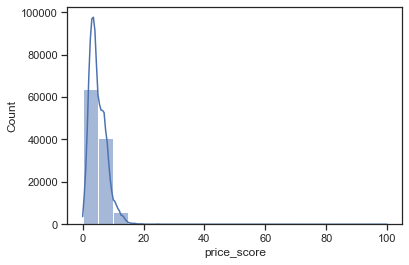

In [39]:
#Ford
sns.histplot(ford_sub['price_score'], bins = 20, kde = True)

<AxesSubplot:xlabel='price_score', ylabel='Count'>

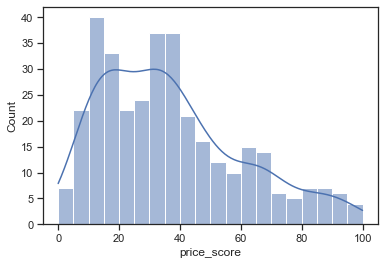

In [40]:
#Ferrari
sns.histplot(ferrari_sub['price_score'], bins = 20, kde = True)

<AxesSubplot:xlabel='price_score', ylabel='Count'>

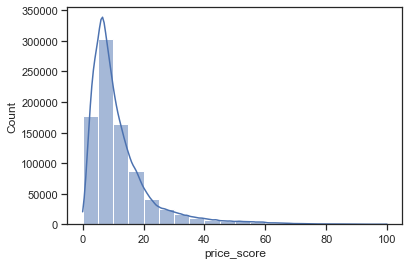

In [41]:
#value_score distribution for all cars in the data set
sns.histplot(df_price_score['price_score'], bins = 20, kde = True)

In [42]:
df_price_score = df_price_score.drop(columns = ['price_min','price_max'])

In [43]:
df_price_score.head()

,Price,Year,Mileage,City,State,Make,Model,Price_Flag,Mileage_Flag,mileage_score,year_score,price_score
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,7.1450,22.727273,3.693389
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed,Low Price,Low Mileage,3.9212,27.272727,4.678813
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed,Low Price,Low Mileage,9.7702,27.272727,3.693389
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed,Low Price,Low Mileage,7.9844,22.727273,4.736596
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic,Low Price,Low Mileage,4.4284,13.636364,6.714732


In [44]:
df_price_score.to_csv(os.path.join(path,'02 Data','Prepared Data','cars_scores.csv'))